# Beautiful Soup
Biblioteka do Pythona.
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [113]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup

Pobieramy html z zegluj.pl i wstępnie procesujemy przez Beautiful Soup.

Trzeba sprawdzić ile jest stron w wynikach, można to napisać ładnie, żeby samo się analizowało, na podstawie klasy disabled (lub jej braku) na elemencie następna strona.

In [114]:
url = "https://zegluj.pl/mazury?date_from=03-06-2024&date_to=09-06-2024&page="

pages = []
for page_number in range(1, 18):
    print(f'Pobieranie strony {page_number}')
    with urllib.request.urlopen(f'{url}{page_number}') as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)


Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15
Pobieranie strony 16
Pobieranie strony 17


In [115]:
pages[0]

<!DOCTYPE html>

<html lang="pl" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>⚓ Czarter jachtów Mazury 2024. Wynajem jachtów na Mazurach - zegluj.pl</title>
<meta content="Czarter jachtów Mazury - 2024. Jachty motorowe, houseboaty oraz żaglówki do czarteru na Mazurach. Porównaj ofertę 130 firm czarterowych, wybierz najlepszą ofertę. Na zegluj.pl znajdziesz najlepsze ceny czarterów oraz oferty last minute. Mazurskie jeziora" name="description"/>
<meta content="czarter, mazury" name="keywords"/>
<meta content="index, follow" name="robots"/>
<link href="https://zegluj.pl/mazury" rel="canonical"/>
<meta content="zegluj.pl | czartery jachtów. Porównaj oferty firm czarterowych. Rabaty do 30%." property="og:title"/>
<meta content="/assets/fb_zegluj-b6311e80fada9f469076f632f87ee111.jpg" property="og:image"/>
<meta content="Proste wyszukiwanie, szybka rezerwacja, intuicyjne określenie wolnych terminów, tylko dostępne oferty. Nowa jakość i wielkość oferty. Kochasz żeglarstwo? Znajdź coś d

Wyciągamy poszczególne boksy z łódkami




In [116]:
full_yacht_data = []
for page in pages:

    full_yacht_data += page.find_all(class_='yacht-box')

In [117]:
full_yacht_data

[<div class="yacht-box">
 <div class="row">
 <div class="col-md-4 yacht-box__column yacht-box__column--overflowed">
 <div class="yacht-box__image">
 <a href="/jacht/pegaz-696/457#/avail/date_from=03-06-2024/date_to=09-06-2024/"><div class="yacht-box__perfect-customer-service"></div>
 <img alt="Mazury czarter - Pegaz 696" src="/system/yacht_cms_images/images/000/002/349/medium/pegaz-696-1668788583.jpg?1668788583"/>
 </a><div class="yacht-box__location">
 <blockquote>Jora Wielka, port Kokoszka</blockquote>
 </div>
 </div>
 </div>
 <div class="col-md-8 yacht-box__column">
 <div class="yacht-box__content">
 <div class="row">
 <div class="col-sm-7 yacht-box-content__left">
 <div class="yacht-box__title">
 <h3 class="yacht-box__name">
 Pegaz 696
 </h3>
 <div class="yacht-box__votescounter">
 <div id="details_more_info"></div>
 <a class="yacht-box__votes" href="/jacht/pegaz-696/457/yacht_reviews#/avail/date_from=03-06-2024/date_to=09-06-2024/" rel="nofollow" title="17 - tyle osób czarterowała

Analizujemy dane i przygotowujemy słownik z danymi

In [118]:
yachts_data = []
for yacht_html in full_yacht_data:
    yacht = {}
    yacht['name'] = yacht_html.find(class_="yacht-box__name").text.strip()
    yacht['price'] = float(yacht_html.find(class_="price right").span.contents[0].replace(' ', '').replace('zł', '').replace('PLN', ''))
    yacht['img'] = f"https://zegluj.pl{yacht_html.img['src']}"
    yacht['url'] = f"https://zegluj.pl{yacht_html.find(class_='yacht-box__image').a['href']}"
    # parameters
    for param_row in yacht_html.select('li.yacht-box-info__item'):
        param_data = param_row.find_all('div')
        param_type = param_data[0].text.strip()
        param_value = re.sub(r'\s+', '', param_data[1].text.strip())
        if 'osób' in param_type:
            #yacht['people'] = param_value
            try:
              yacht['people'] = int(param_value.split('-')[-1])
            except ValueError:
              yacht['people'] = None
        elif 'kabin' in param_type:
            try:
                yacht['cabins'] = int(param_value.split('-')[-1])
            except ValueError:
                yacht['cabins'] = None
            # yacht['cabins'] = int(param_value)
        elif 'produkcji' in param_type:
            yacht['year'] = param_value

    yachts_data.append(yacht)

In [119]:
yachts_data

[{'name': 'Pegaz 696',
  'price': 942.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/002/349/medium/pegaz-696-1668788583.jpg?1668788583',
  'url': 'https://zegluj.pl/jacht/pegaz-696/457#/avail/date_from=03-06-2024/date_to=09-06-2024/',
  'people': 4,
  'cabins': 1,
  'year': '2000'},
 {'name': 'Sasanka 660 Supernova',
  'price': 1020.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/027/375/medium/sasanka-660-supernova-1707388866.jpg?1707388866',
  'url': 'https://zegluj.pl/jacht/sasanka-660-supernova/2048#/avail/date_from=03-06-2024/date_to=09-06-2024/',
  'people': 5,
  'cabins': 0,
  'year': '2014'},
 {'name': 'Mazurek 650',
  'price': 1020.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/007/818/medium/mazurek-650-1668791707.jpg?1668791707',
  'url': 'https://zegluj.pl/jacht/mazurek-650/917#/avail/date_from=03-06-2024/date_to=09-06-2024/',
  'people': 6,
  'cabins': 0,
  'year': '2010'},
 {'name': 'Kuter',
  'price': 1040.0,
  'im

Możemy dalej analizować pozyskane dane.

In [120]:
df = pd.DataFrame.from_dict(yachts_data)
df['cabins'].fillna(0, inplace=True)
df.head(35)

,name,price,img,url,people,cabins,year
0,Pegaz 696,942.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/pegaz-696/457#/avail/d...,4,1.0,2000
1,Sasanka 660 Supernova,1020.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-660-supernova/...,5,0.0,2014
2,Mazurek 650,1020.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/mazurek-650/917#/avail...,6,0.0,2010
3,Kuter,1040.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/kuter/1242#/avail/date...,4,1.0,2005
4,Tango 780 Family,1080.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/tango-780-family/279#/...,6,0.0,2011
5,Sasanka 660 Supernova,1260.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-660-supernova/...,6,0.0,2020
6,Sasanka 700 Viva,1260.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-700-viva/655#/...,6,0.0,2020
7,Tes 678 BT,1380.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/tes-678-bt/671#/avail/...,6,0.0,2010
8,Antila 24,1380.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/antila-24/1939#/avail/...,8,0.0,2010
9,Laguna 25 (730),1500.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/laguna-25-730/1368#/av...,8,0.0,2017


array([[<Axes: title={'center': 'price'}>]], dtype=object)

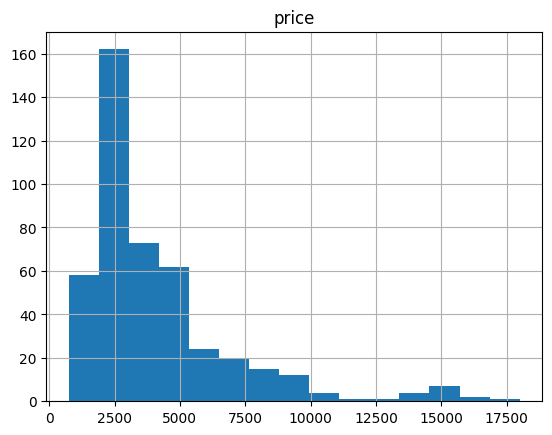

In [121]:
df.hist(column='price', bins=15)

In [122]:
df[ df.price > 17000 ] # 100_000

,name,price,img,url,people,cabins,year
445,Axopar 28 Cabin,18000.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/axopar-28-cabin/1893#/...,8,1.0,2022


array([[<Axes: title={'center': 'price'}>]], dtype=object)

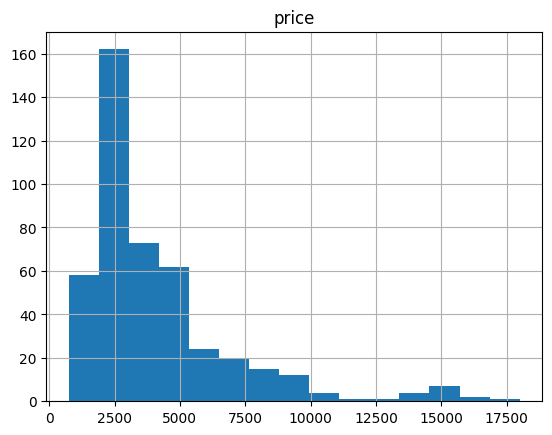

In [123]:
df[ df.price <= 100000 ].hist(column='price', bins=15)

array([[<Axes: title={'center': 'people'}>]], dtype=object)

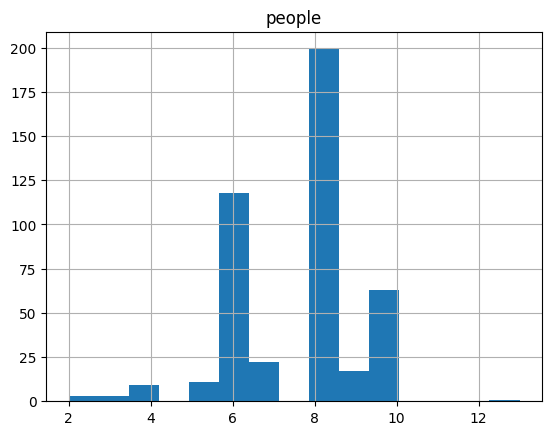

In [124]:
df.hist(column='people', bins=15)

<Axes: xlabel='people', ylabel='price'>

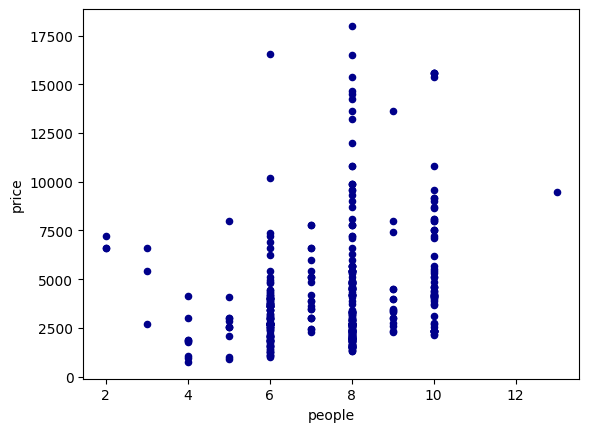

In [125]:
df.plot.scatter(x='people', y='price', c='DarkBlue')

Szczegółowe dane do łódek

In [152]:
import requests

availability_data = []

for yacht in yachts_data:
    print(f"Przetwarzanie danych dla łódki: {yacht['name']}")

    yacht_url = yacht['url']

    response = requests.get(yacht_url)
    if response.status_code == 200:

        yacht_html = BeautifulSoup(response.text, 'html.parser')

        equipment_section = yacht_html.find(class_='category-content')

        uprawnienia_div = yacht_html.find('div', class_='yacht-details__summary').find_all('div', class_='col-md-6')
        for div in uprawnienia_div:
            if 'uprawnienia:' in div.text:
                qualification = div.find('strong').text if div.find('strong') else 'Nie znaleziono uprawnień'
                yacht['qualification'] = qualification
                break

        if equipment_section:

            availability_data.append({'name': yacht['name'], 'data_available': True})

            fridge = False
            tv = False
            chemical_toilet = False

            for item in equipment_section:

                text = item.text.strip().lower()
                #print(text)

                if 'lodówka' in text:
                    fridge = True
                if 'tv' in text:
                    tv = True
                if 'toaleta' in text:
                    chemical_toilet = True

            yacht['fridge'] = fridge
            yacht['tv'] = tv
            yacht['chemical_toilet'] = chemical_toilet
        else:
            availability_data.append({'name': yacht['name'], 'data_available': False})
            print(f"Nie znaleziono sekcji z wyposażeniem dla łódki: {yacht['name']}")
            yacht['fridge'] = False
            yacht['tv'] = False
            yacht['chemical_toilet'] = False
    else:
        availability_data.append({'name': yacht['name'], 'data_available': False})
        print(f"Nie można pobrać danych dla łódki: {yacht['name']}")


Przetwarzanie danych dla łódki: Pegaz 696
Przetwarzanie danych dla łódki: Sasanka 660 Supernova
Przetwarzanie danych dla łódki: Mazurek 650
Przetwarzanie danych dla łódki: Kuter
Przetwarzanie danych dla łódki: Tango 780 Family
Przetwarzanie danych dla łódki: Sasanka 660 Supernova
Przetwarzanie danych dla łódki: Sasanka 700 Viva
Przetwarzanie danych dla łódki: Tes 678 BT
Przetwarzanie danych dla łódki: Antila 24
Przetwarzanie danych dla łódki: Laguna 25 (730)
Przetwarzanie danych dla łódki: Maxus 24
Przetwarzanie danych dla łódki: Maxus 24
Przetwarzanie danych dla łódki: Solina 24
Przetwarzanie danych dla łódki: Maxus 24
Przetwarzanie danych dla łódki: Twister 26
Przetwarzanie danych dla łódki: Twister 26
Przetwarzanie danych dla łódki: Twister 26
Przetwarzanie danych dla łódki: Twister 26
Przetwarzanie danych dla łódki: Laguna 700 Cruiser
Przetwarzanie danych dla łódki: Phobos 22
Przetwarzanie danych dla łódki: Endorphino 22
Przetwarzanie danych dla łódki: Fortuna 27 TS
Przetwarzanie d

In [153]:
print(yachts_data[:5])

[{'name': 'Pegaz 696', 'price': 942.0, 'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/002/349/medium/pegaz-696-1668788583.jpg?1668788583', 'url': 'https://zegluj.pl/jacht/pegaz-696/457#/avail/date_from=03-06-2024/date_to=09-06-2024/', 'people': 4, 'cabins': 1, 'year': '2000', 'fridge': False, 'tv': False, 'chemical_toilet': True, 'qualification': 'Patent żeglarski'}, {'name': 'Sasanka 660 Supernova', 'price': 1020.0, 'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/027/375/medium/sasanka-660-supernova-1707388866.jpg?1707388866', 'url': 'https://zegluj.pl/jacht/sasanka-660-supernova/2048#/avail/date_from=03-06-2024/date_to=09-06-2024/', 'people': 5, 'cabins': 0, 'year': '2014', 'fridge': True, 'tv': False, 'chemical_toilet': True, 'qualification': 'Bez patentu'}, {'name': 'Mazurek 650', 'price': 1020.0, 'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/007/818/medium/mazurek-650-1668791707.jpg?1668791707', 'url': 'https://zegluj.pl/jacht/mazurek-650/

In [154]:
df = pd.DataFrame(yachts_data)

print(df)

                      name    price  \
0                Pegaz 696    942.0   
1    Sasanka 660 Supernova   1020.0   
2              Mazurek 650   1020.0   
3                    Kuter   1040.0   
4         Tango 780 Family   1080.0   
..                     ...      ...   
441             Mirakul 30  14256.0   
442           Grandezza 28  14520.0   
443            Sea Ray 265  16524.0   
444         Saxdor 320 GTO  16536.0   
445        Axopar 28 Cabin  18000.0   

                                                   img  \
0    https://zegluj.pl/system/yacht_cms_images/imag...   
1    https://zegluj.pl/system/yacht_cms_images/imag...   
2    https://zegluj.pl/system/yacht_cms_images/imag...   
3    https://zegluj.pl/system/yacht_cms_images/imag...   
4    https://zegluj.pl/system/yacht_cms_images/imag...   
..                                                 ...   
441  https://zegluj.pl/system/yacht_cms_images/imag...   
442  https://zegluj.pl/system/yacht_cms_images/imag...   
443  http

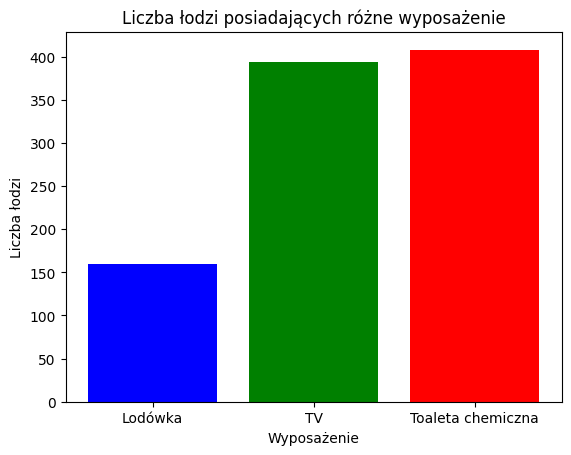

In [155]:
import matplotlib.pyplot as plt

# Liczenie ilości łodzi posiadających lodówkę, TV i toaletę chemiczną
fridge_count = sum(yacht.get('fridge', False) for yacht in yachts_data)
tv_count = sum(yacht.get('tv', False) for yacht in yachts_data)
chemical_toilet_count = sum(yacht.get('chemical_toilet', False) for yacht in yachts_data)

labels = ['Lodówka', 'TV', 'Toaleta chemiczna']
counts = [tv_count, fridge_count, chemical_toilet_count]

plt.bar(labels, counts, color=['blue', 'green', 'red'])
plt.xlabel('Wyposażenie')
plt.ylabel('Liczba łodzi')
plt.title('Liczba łodzi posiadających różne wyposażenie')
plt.show()

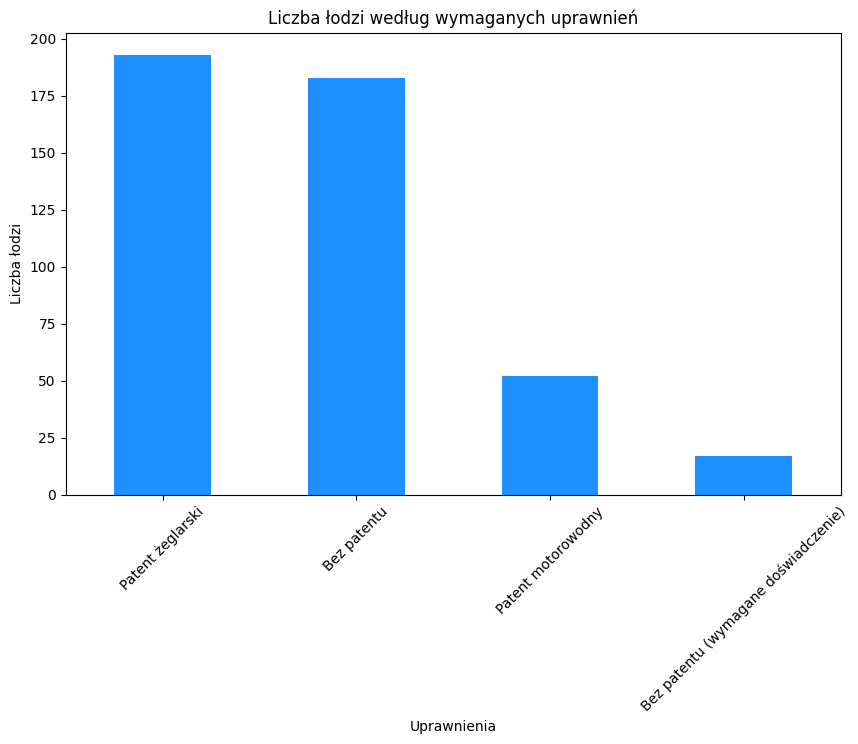

In [159]:
qualification_counts = df['qualification'].value_counts()

plt.figure(figsize=(10, 6))
qualification_counts.plot(kind='bar', color='dodgerblue')
plt.title('Liczba łodzi według wymaganych uprawnień')
plt.xlabel('Uprawnienia')
plt.ylabel('Liczba łodzi')
plt.xticks(rotation=45)
plt.show()

In [133]:
from collections import Counter

In [134]:
yacht_names = [yacht['name'] for yacht in yachts_data]

yacht_name_counts = Counter(yacht_names)

for name, count in yacht_name_counts.most_common():
    print(f"Nazwa łodzi: {name}, Liczba wystąpień: {count}")

Nazwa łodzi: Stillo 30 (Futura 900), Liczba wystąpień: 37
Nazwa łodzi: Antila 27, Liczba wystąpień: 24
Nazwa łodzi: Antila 24.4, Liczba wystąpień: 18
Nazwa łodzi: Calipso 750, Liczba wystąpień: 17
Nazwa łodzi: Nexus 870 Revo, Liczba wystąpień: 13
Nazwa łodzi: Maxus 24 Evo, Liczba wystąpień: 12
Nazwa łodzi: Phobos 25, Liczba wystąpień: 12
Nazwa łodzi: Platinum 35 (989), Liczba wystąpień: 12
Nazwa łodzi: Antila 24, Liczba wystąpień: 11
Nazwa łodzi: Antila 26 CC, Liczba wystąpień: 11
Nazwa łodzi: SunCamper 35, Liczba wystąpień: 11
Nazwa łodzi: Nautika 1000, Liczba wystąpień: 9
Nazwa łodzi: Futura 40, Liczba wystąpień: 9
Nazwa łodzi: Twister 26, Liczba wystąpień: 7
Nazwa łodzi: Nautika 830, Liczba wystąpień: 7
Nazwa łodzi: Antila 33, Liczba wystąpień: 7
Nazwa łodzi: Laguna 700 Cruiser, Liczba wystąpień: 6
Nazwa łodzi: Calipso 23, Liczba wystąpień: 6
Nazwa łodzi: Phobos 21, Liczba wystąpień: 5
Nazwa łodzi: Sedna 26, Liczba wystąpień: 5
Nazwa łodzi: Solina 27, Liczba wystąpień: 5
Nazwa łodzi

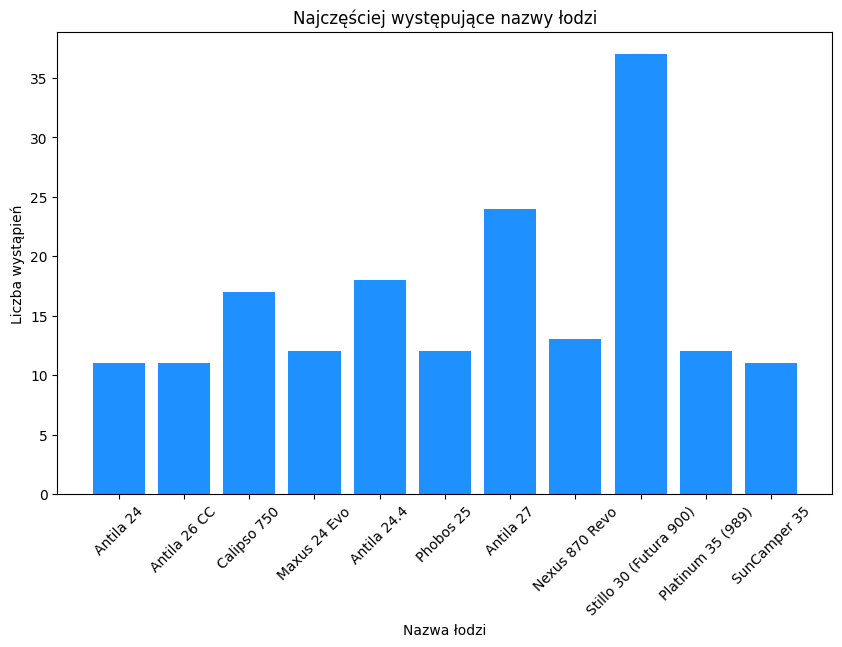

In [146]:
yacht_names = {name: count for name, count in yacht_name_counts.items() if count > 10}

yacht_name_counts = Counter(yacht_names)

names = list(yacht_name_counts.keys())
counts = list(yacht_name_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(names, counts, color='dodgerblue')
plt.title('Najczęściej występujące nazwy łodzi')
plt.xlabel('Nazwa łodzi')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.show()

In [144]:
import seaborn as sns
df = df.sort_values(by='year')

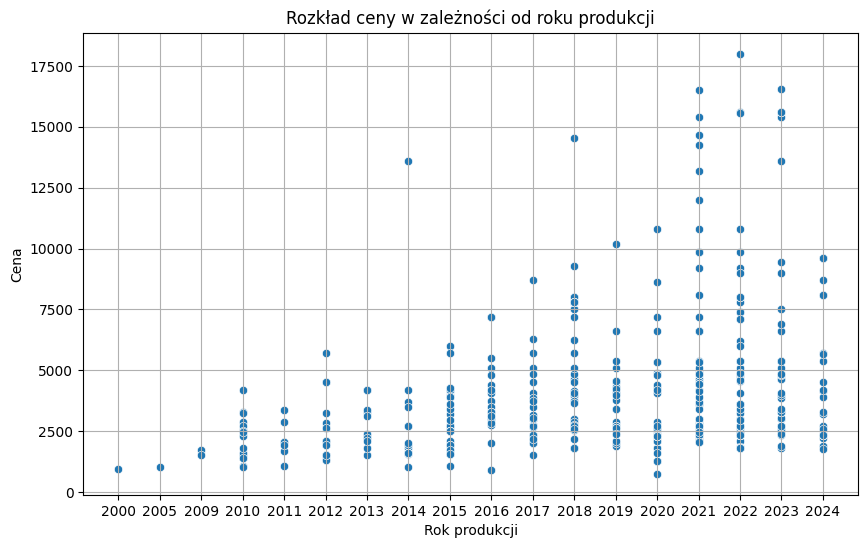

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Rozkład ceny w zależności od roku produkcji')
plt.xlabel('Rok produkcji')
plt.ylabel('Cena')
plt.grid(True)
plt.show()